# Introduction to Machine Learning with Classification, Decision Trees, KNN and Mathematics.

This Notebook is an Addition to the Work already presented (Titled: Visual Data Analysis of Accidents Using Python, NumPy, Pandas, Matplotlib and Seaborn), which was based on How to Implement Python and its Libraries to Visualize a given Dataset and provide an Analysis on it.<br>

This notebook will be about my learnings from the article/notebook by <a href="https://www.kaggle.com/kashnitsky">"Yury Kashnitsky"</a>, This is going to be put through in a way that every beginner shall get a firm gist of what Machine Learning consists of and the Amount of Learning that it has got to provide.<br>
There are going to be a few Sentences/Lines from the Work by Sir Yury gathered via his notebook.<br>

The Links and referrals are provided below:<br>

Learn Introduction to Machine Learning using Classification, Decision Trees and KNN through Blogs/Notebooks: https://www.kaggle.com/code/kashnitsky/topic-3-decision-trees-and-knn#1.-Introduction <br>
Traffic Accidents Dataset: https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents <br>

The previous Article covered topic like What is Univariate Visualization, Quantitative and Qualitative Features, Plotting Several types of Graphs using Seaborn and Matplotlib, and more.<br>

This time we are going to focus on the basics of Machine Learning types and their Algorithms, More importantly, Understanding the Mathematics behind them and using it alongside our Intuition to come up with Better Results.<br>

We also will be using the Go-To library for beginners in Machine Learning: Scikit-learn, all thanks to its Simpicity of Syntax in Python and Implementation of a Variety of Algorithms.

## Introduction

This section will be answering a few questions and providing a brief information about questions such as "What Machine Learning algorithms do?", "How do these algorithms differ", "Types of Machine Learning Methods.", etc. 

Sir Yuri goes through the book "Machine Learning" (1997) by T. Mitchell showcasing the "General Definition of Machine Learning" by:<br>
> A Computer Program is said to learn from experience "E" with respect to some Class of Tasks "T" and Performance Measure "P", if its Performance at Tasks in T, as measured by P, Improves with "E".

The Above Measures/Quantities do mean different outcomes in various context's but when it comes to Machine Learning, the Quanitity "T" can refer to:<br>
1. Classification: Differentiating Objects based on their Features/Qualities.
2. Regression: Prediction of a numerical target feature based on other features of an instance.
3. Clustering: Identifing partitions of Instances based on the Features of these instances so that the members within the gorups are more similar to each other than those in the other groups.(Comparing and Creating groups of Similar Data)
4. Anomaly Detection: Searching for instances that Differ from rest of the sample or to group of instances, The search can be established by looking for a large difference between the features(Either Quantitative or Qualitative, or both.)<br>

There are many more important references and Meanings to this "T".

The Experience "E" Refers to "Data", the fundamental pieces over which Analysis, Training, Valiating, Testing, etc is to be done, without Data,  we cannot simply start with any of those.<br>
Data, comes in different Shapes and Forms, Most having the general purpose of holding some information to it, When we combine greater chunks of Data and segregate them based on their Qualities we get a <strong>Dataset</strong>.<br>
The Qualities based on which the data has been segregated are called "Features" and the values residing in these features for any given index is called its "Instance".

Understanding Data, Its Functions and Management(Cleaning, Organizing, Manipulating large portions, etc) are all covered in My First <a href="https://github.com/Yeeyash/EDA_Traffic_Accidents">EDA Notebook</a>

We can Understand these terms by experimenting with the Dataset itself.

### Importing Libraries

Pandas as pd --> Pandas is used for creating a Dataframe(refferd as "df"), manipulating and cleaning of data.

NumPy as np --> NumPy(Numerical Python) is a well known library for creating and performing Mathematical functions over Multi-Dimensional Arrays.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In here, we can see a <strong>"DataFrame"</strong>. this is a more visually informative form of a Dataset, arranged in Rows and Columns like a table.<br>
All the Observed "Columns" are "Features" for Data residing inside them, Observed "Rows" are the "Instances" which follow a given "Feature".<br>
For Example, "Clear" is the "Instance" for its given "Feature" - "weather_condition", and so on.

Moreover, The Quantity "E"(Experience) is "trained" through Machine Learning Algorithms via "Supervised" or "Unsupervised" methods. Supervised Learning is done by providing the Algorithm a "Target Variable" or a "Target Feature" which is used to predict outcomes based on given Features and their Instances, This Target Feature is also used to Calculate insights such as "Accuracy" and more.<br>
In Unsupervised Learning, Algorithm has to predict outcomes solely based on the provided Features and Instances, This is usually done when a target feature is not present in th DataSet for our Training Set.

For Exammple, In our "traffic_accidents" DataSet, the target feature can be a Column representing if an Accident has occured or not(1 or 0, 1 for True, 0 for False) which can be used by an Algorithm trained on Features such as "weather_condition","road_defects",etc.

We will look how Machine Learning Algorithms work by Two Supervised Learning Problems: Classification and Regression.<br>
Starting off with the most popular one, A Decision Tree.

## Decision Trees

Decision Trees are the most popular methods of Classification and Regression, this is because Decision Trees are not only used in Machine Learning but our everyday lives as well, Say there is a party to attend and one has to decide which dress to wear, the sequence of thoughts a person goes through before coming to an conclusion is only a Decision Tree, These can also be thought off as multiple "IF" and "ELSE" statements that occur until a target is achieved.

Flow Diagrams are the Visual Representation for Decision Trees.

In terms of Machine Learning, one can also think these as Classifiers that determine the appropriate match of dress for a party, based on its theme.

In this Notebook, we will be solving a Binary CLassification Problem(Did an Accident Happen or Not) based on the "road defects", "weather condition", "intersection related i" and more features.

<img src="decTree.jpeg"></img>

Decision Trees in Machine Learning as Algorithms is same as making a sequence of logical Rules of the form "Feature x value is True based on provided Condition = Category 1.", into a tree like data structure.

The Advantage of this Algorithm is that it is easily interpretable and is understood quickly. for example, one can distinguish if the accident is caused by contribution of "Weather Conditions" or not just by knowning if Accident has occured based on other features.

There are many more better performing models that also are more accurate, but do not deliver the same "Easy in Understanding" and hence are more difficult to comprehend, this can be an issue when it comes to explaining the model to soomeone who belongs from a non - technical background.

## How to Build a Decision Tree

Since, The Decision that an Accident has occured or not is based on conditions regarding road, weather, lighting, track type, whether there was an intersection or not, etc. The Deciding Factor turns out to be - What Variable to look after first?

Whenever trying to figure out which Variable is to be considered and which not to, always start tackling the problem with "Broarder Scope" or the most random argument which can be made while keeping it relevant to the topic, In our case, the first Intuition could be - "Are there any Pot Holes on the road" or "Was the Weather rainy/in Monsoon". After Identifying the Issue, keep narrowing the statements until a Binary Route(Either this or that) is achieved. Say, after our initial Statement, one had raised more dampning questions and came to a statement - "Was there any Intersection?" or "Was the person that got into the Accident Monitered by some Traffic Control(Traffic Light/Police, etc)". These are all statements which initially began with a high randomness and slowly became more clear and stable/less random. Hence, referring to the concept of "Entropy".

### Entropy

Entropy like Machine Learning also comes in a few shapes and forms, Thermodynamic, Statistical, Information(Shannon), Negentropy(Opposite of Entropy), Dynamic System, Sociological, Cosmological and more.<br>

Each point to the same path - "Degree of Randomness" for a given system.<br>
This states how randomly organized the elements inside a system are, Higher entropy results in higher randomness, whereas, Lower entropy means more organized.<br>
A Higher Entropy means lesser energy left inside the system to work, hence more stability and vice-versa.<br>

In our case, we will be studying Shannon's Entropy or "Information Entropy". Higher Entropy means more "noise" and more residual information to further filter.

#### Shannon's Entropy

"A measure of the average amount of information or uncertainity associated with a random variable".<br>

This is calculated using the probabilities of different outcomes of a random variable.<br>
A Higher Entropy indicates that random variable is of high uncertainity and probability of its occurence is very low.<br>
A lower Entropy on the other hand, represents that the system is more predictable and elements have a high probability of occuring, like getting a "heads" when a coin is tossed(50% is high).<br>

Hence, Shannon's Entropy is related to the uncertainity of a system and outcomes can be visualized and predicted/calculated intuitively as well.

The Formula for Shannon's Entrop is:
<img src="Shantropy.png"></img>

Where "H" represents Entropy for System, "K" is the number of entities and "p<sub>i</sub>" being the Individual Probabilities of that entity.

#### Information Gain(IG)

In Decision Tree Algorithms, Information Gain is used to select the most informative feature to split the data at each node, aiming to Improve Classification Accuracy and reduce Uncertainity.<br>
The Feature with the highest information gain is used to split the data, this leads to better accuracy and less overfitting.

## Tree Building Algorithm

Popular Decision Tree Algorithms such as "ID3" or "C4.5" contain the principle of "Greedy Maximization of Information Gain", This means the Algorithm chooses the option/path with best probability to result in the most optimal solution.

The procedure is repeated recursively until the entropy is zero(or some small value).<br>
Other Algorithms use thode concept of "early stopping" or "cut off" just to avoid overfitting.

Let us see how the trees look themselves, We will try to seperate two classes by training an "Sklear" Decision Tree, using its "Max Depth" parameter that limits the depth of the tree.

In [3]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:,1].max() + 1

    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 17)

For analysing data, we will have to get some first, in this case we will be working with artificial data created by random seeds.

In [4]:
##first class
np.random.seed(17)
train_data = np.random.normal(size=(100,2))
train_lables = np.zeros(100)

#Seond Class
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc = 2)]
train_lables = np.r_[train_lables, np.ones(100)]

To visualize this, we can use plots.

In [5]:
import matplotlib.pyplot as plt

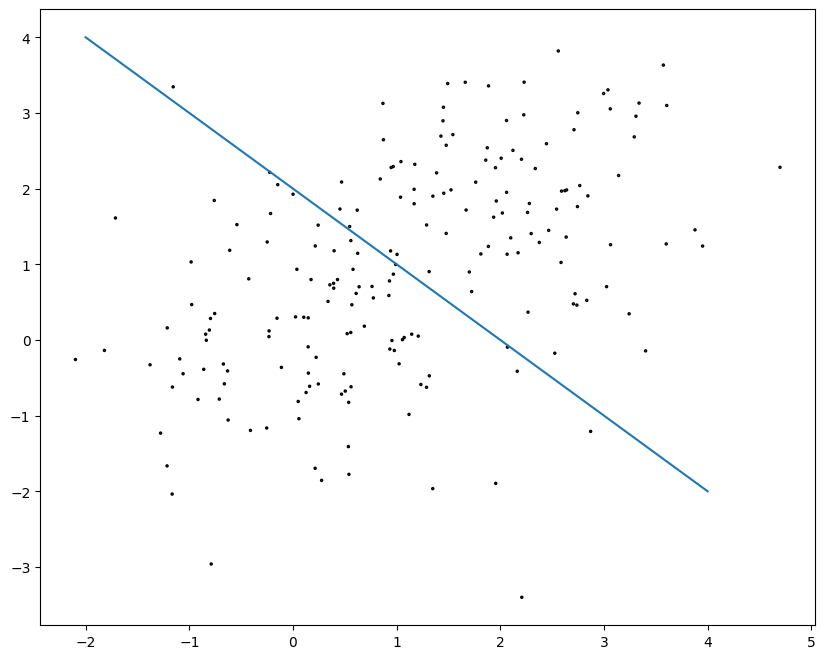

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(
    train_data[:,0],
    train_data[:,1],
    c=train_lables,
    s=1,
    cmap="autumn",
    edgecolors="black",
    linewidths=1.5
)
plt.plot(range(-2,5), range(4,-3,-1))

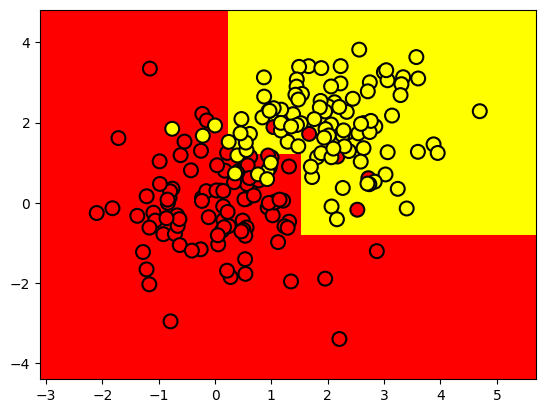

In [6]:
##training the data

clf_tree.fit(train_data, train_lables)

#code to seperate surfaces

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:,0],
    train_data[:,1],
    c=train_lables,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidths=1.5
)

Now, we can proceed in drawing the "Trees"

In [28]:
import pydotplus
from sklearn.tree import export_graphviz

def tree_graph_png(tree, feature_names, pngtofilesave):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(pngtofilesave)

In this Function, we can input our trained data(classification tree model)

In [34]:
# tree_graph_png(tree=clf_tree, feature_names=["x1", "x2"], pngtofilesave="FirstDecisionTrese.png")

Make sure to have <a href="https://graphviz.org/">Graphviz</a> Installed before running these.

<img src="DecTree.png"></img>

### How to Read a Decision Tree.

Starting off with the first cell, We come to know there were 200 Instances(inside Sample) contained in 2 classes(as seen from [100, 100]). This cell also has the highest entropy of S = 1(Entropy is measured between 0 to 1 here) <br>
After the first partition, 2 Cells were made once compared by "x<sub>2</sub>" with 1.211, along with the partition, the entropy of each cell reduces and so did the sample count for each Case(Notice the sum of "values" on every depth of Decision Tree is always equal to the original number of sample of data we started off with, this makes sure that no data has been lost in between).<br>

The Algorithm goes to a Depth of "3", Notice, How in all cases where the value of Class 1 is greater than that of Sample 2, Colour of Cell is "More Orange", and for the cells where Class 2 gains higher count, the Color is "More Blue" (Or Darker shades of respective Colors).


### How a Decision Tree Works with Numerical Features.

For this Block, I will be using the same example of "Age vs Loan Default" for explaination.

When it comes to using a Classification Algorithm(like a Decision Tree), The Algorithm always splits the data in such a way that it gets the best Information Gain(based on any Criterion). So, when working with real world samples such as "Age" and the probability of that person getting a "Loan" there have to be multiple possible unique values, these are the values that Algorithm will be checking for the best split, Say comparing "Age" feature for binary Attributes like is "Age > 18" or "Age >= Mean(Age)", etc.<br>
There can also be multiple Quantitative Variables, In this case where loans have to be paid by the Individual, "Salary" can be an important factor.

In order to limit the number of thresholds to which we compare the quantitative variables, Heuristics are used.

In [36]:
# Consider this being a real dataset with Age and Loan Default Featues.

data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [37]:
data.sort_values(by="Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [39]:
# age_tree = DecisionTreeClassifier(random_state=17)
# age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)

# tree_graph_png(
#     age_tree,
#     feature_names=["Age"],
#     pngtofilesave="topic3_decision_tree2.png",
# )

Natuarally, the above cell shall give the following Tree.<br>
<img src="AgeTree.png"></img>

When Observed, There are total 5 Splits at Age = 43.5, 19, 22.5, 30, 32 and 0.<br>
These Splits are made based on the least Gini Impurity and best case for our sample. The splits can be explained like:<br>
1. Note that there are total 11 samples in our DataSet, 5 - Class 0, 6 - Class 1 (Remember, values=[Available Class 0, Available Class 1]). The First Split happens at mean position(4th, 5th) at Age 38 and 49.
2. First Split resulted in 2 Cases, For "Age <= 43.5" == False, Hence Age > 45, No Person Exists that has returned their Loan(Check Sorted DataFrame, After Age 38, All are 0's) Hence resulting in a Pure Node.
3. For Age <= 19, we have 2 Splits since More Samples are still present and Either or the Values(values = []) are not 0(Hence, not a pure node.), One, Resuling in a Pure Node, Since the People of Age 17 and 18 have paid there Loan's. On the other hand;
4. We check for People with Age <= 22.5, We see a Pure Node since Only Person with Age 20(Less than 22.5) has not paid their loan, others Have, and we come to People with Age <= 30;
5. The Split at Age = 30 was made since, it was minimizing the gini impurity. On the left(Tree Node) we see another Pure Node, all people below Age 30 and Above 22.5 (Since we do not have to consider the people that have been a part of our previous node) have paid their Loan.
6. Coming to Another Split at Age 32, We see that People between range 30 < Age <= 32 the only person fitting in this category has also paid his Loan and For the People that are Older than 32 yet younger than 43.5(Remember, Do not Include Age band that has been included in a prior node) None of the People have paid their Loan, Hence the value of [0, 2].

Let us go with a more complex example using "Salary" variable in the DataSet as well. Salary is in thousands of Dollars/year.

In [7]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [10]:
data2.sort_values(by="Salary")

,Age,Salary,Loan Default
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


If noticed, Here, when the data is sorted by "Salary" the number of switches(Between Classes being state of 1, 0) are 7 times, Whereas, When sorting by "Age" gave us 5.<br>

Let us Fit this data into Decision Tree.

In [ ]:
sal_tree = DecisionTreeClassifier(random_state=17)
sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values)

<img src="AgeSalaryTree.png"></img>

"We see that the tree partitioned by both salary and age. Moreover, the thresholds for feature comparisons are 43.5 and 22.5 years of age and 95k and 30.5k per year. Again, we see that 95 is the average between 88 and 102; the individual with a salary of 88k proved to be "bad" while the one with 102k was "good". The same goes for 30.5k. That is, only a few values for comparisons by age and salary were searched. Why did the tree choose these features? Because they gave better partitioning (according to Gini uncertainty)."

"Conclusion: the simplest heuristics for handling numeric features in a decision tree is to sort its values in ascending order and check only those thresholds where the value of the target variable changes."

When dealing with multiple numeric features containing lots of unique values, Go for the "Top-N" thresholds, these are the one's that result in maximum gain.<br>
To Select the best Thresholds:<br>
1. Construct a Tree of Depth 1.
2. Compute Entropy or Gini Uncertainity and Select the Best Comparisons.

## Parameters Involved.

When it comes to building a Decision Tree, Every Tree can be build such that there is only a Single Instance Available Hence Creating a Pure Node, but doing this the tree will become "Overfitted" and hence, not be able to predict labels for new data.<br>

This Results in the model becoming too finely tuned to the training data and not being able to generate generalized trends. This leads to poor performace when showed to Unseen or New data.

In the Traffic Accident DataSet, If our model were to be overfitted, even features(say these were present) such as which colour shoes did the person wear, etc will lead to a False Outcome.

To avoid this, Usually the Tree is either Pruned Before hand or After the Tree is Created.<br>
1. Pre-Pruning: Avoiding Tree to go to a higher Depth(Pre Define Max Depth).
2. Post-Pruning: After the Tree has been Generated, Remove all Nodes(Depth by Depth) that do not further Contribute to the Situation.

There is an Algorithm(Based on Decision Trees) that helps reduce overfitting and perform well in both Classification and Regression tasks = Random Forest.

### Random Forest

An Algorithm which goes to the Maximum Depth for a Decision Tree, Where The Algorithm Creates "Multiple" Decision Trees and Creates a "Forest" for them. Each being a random subset of the Training DataSet. Moreover, When Splitting nodes, It considers a random subset of features rather than going for All Featuers.

The Algorithm works well with both:<br>
1. Classification: Each tree votes for a class and The Forest Selects the Class with most Votes.
2. Regression: Forest Averages the outputs of all trees to produce the Final Prediction.
<br>
This randomness also reduces Correlation between trees. Improving Generalization and Reducing Overfitting of Data.<br>

Although, these come with a cost of computation time and resources. When Compared to a Single tree, these are slower to train as well.

## DecisionTreeClassifier in Scikit-learn

This Class has the following important parameters:<br>
1. max_depth - Maximum Depth of a Tree.
2. max_features - Limits the number of Features to use for searching the Best Split(Necessary, Since looking for Each Feature in A Large DataSet will be very expensive).
3. min_samples_leaf - Set's the minimum Number of Samples alloted to a leaf, this prevents early exhaustion of samples before reaching a higher depth.

## Decision Trees in Regression.

When predicting a numeric variable, The idea of tree construction remains the same but, the quality criteria changes to "Variance" instead of previously worked "Entropy"(or "Gini Impurity", etc).

<img src="variance.png"></img><br>
Here, "l" is the number of samples in a leaf and y<sub>i</sub> is the value of Target Variable.<br>

Minimizing the Variance will result in Every Leaf roughly giving an equal result.

- The Picture was also taken From <a href="https://www.kaggle.com/code/kashnitsky/topic-3-decision-trees-and-knn#3.-Nearest-Neighbors-Method">Yuri Sir's Notebook</a> in order to save up on time.